# Table of Contents
- [0. Problem Statement](#0.-Problem-Statement)
- [1. Overview of my results and my approach](#1.-Overview-of-my-results-and-my-approach)
- [2. Importing all relevant modules](#2.-Importing-all-relevant-modules)
- [3. Data Preparation](#3.-Data-Preparation)
    - [3.1 Importing the data](#3.1-Importing-the-data)
    - [3.2 Checking for any outliers](#3.2-Checking-for-any-outliers)
- [4. Correlation Analysis](#4.-Correlation-Analysis)
- [5. Principal Components Analysis (PCA) for dimensionality reduction](#5.-Principal-Component-Analysis-(PCA)-for-dimensionality-reduction)
    - [5.1 Running PCA and choosing the optimal amount of principal components](#5.1-Running-PCA-and-choosing-the-optimal-amount-of-principal-components)
    - [5.2 Interpreting the PCA results](#5.2-Interpreting-the-PCA-results)
- [6. Employing k-means clustering to classify the broader dataset](#6.-Employing-k-means-clustering-to-classify-the-broader-dataset)
    - [6.1 Elbow Method to find the optimal number of clusters](#6.1-Elbow-Method-to-find-the-optimal-number-of-clusters)
    - [6.2 Performing k-means clustering](#6.2-Performing-k-means-clustering)
    - [6.3 Visualising the clusters](#6.3-Visualising-the-clusters)
- [7. Focusing on poorer countries](#7.-Focusing-on-poorer-countries)
    - [7.1 Clustering: preparing the data](#7.1-Clustering:-preparing-the-data)
    - [7.2 Clustering: which countries face the greatest economic hardships?](#7.2-Clustering:-which-countries-face-the-greatest-economic-hardships?)
    - [7.3 Clustering: which countries face the greatest public health crisis?](#7.3-Clustering:-which-countries-face-the-greatest-public-health-crises?)
    - [7.4 Final Results: to be used in context and in collaboration with domain expertise](#7.4-Final-Results:-to-be-used-in-context-and-in-collaboration-with-domain-expertise)
    - [7.5 The only specific recommendation I will make...](#7.5-The-only-specific-recommendation-I-will-make...)
-  [8. Acknowledgements](#8.-Acknowledgements) 

# 0. Problem Statement

**Problem Statement:** HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

**About organization:** HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

**About Dataset** : HELP International have provided you with the data set found in Country-data.csv. It contains the below statistics on 167 countries.  

* ***child_mort:*** Death of children under 5 years of age per 1000 live births  
* ***exports:*** Exports of goods and services per capita. Given as %age of the GDP per capita  
* ***health:*** Total health spending per capita. Given as %age of GDP per capita  
* ***imports:*** Imports of goods and services per capita. Given as %age of the GDP per capita  
* ***Income:***	Net income per person  
* ***Inflation:*** The measurement of the annual growth rate of the Total GDP  
* ***life_expec:*** The average number of years a new born child would live if the current mortality patterns are to remain the same  
* ***total_fer:*** The number of children that would be born to each woman if the current age-fertility rates remain the same.  
* ***gdpp:*** The GDP per capita. Calculated as the Total GDP divided by the total population.  

# 1. Overview of my results and my approach

**<u>My approach is simple and can be explained broadly in three main steps:</u>**

1) Analysis and characterisation of the broader dataset of all countries. I identify a pool of poorest countries.
2) Zoom-in on the poorest countries to better understand those facing the greatest hardship economically and from a public health crisis perspective.
3) Recommendations made taking our results into context.

**<u>Brief summary of results:</u>**

I identify **Haiti** as the prime contender for aid. It has the lowest life expectancy, the highest child mortality and is amongst the countries facing the greatest economic hardship.

Other important observations:

- I identify the following cluster of countries in greatest economic turmoil:
    - [Afghanistan, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad,  Comoros, Congo, Dem. Rep., Cote d'Ivoire, Gambia, Guineau-Bissau, Haiti, Kenya, Kiribati, Lesotho, Liberia, Madagascar, Malawi, Mali, Mozambique, Niger, Rwanda, Senegal, Sierra Leone, Tanzania, Timor-Leste, Togo, Uganda]
- Identify the following cluster of countries in greatest public health struggle:
    - [Angola, Burkina Faso, Central African Republic, Chad, Congo, Dem. Rep., Haiti, Mali, Niger, Nigeria, Sierra Leone]
- The following cluster of countries are amongst those with greatest economic turmoil <u>and</u> public health struggles:
    - [Burkina Faso, Central African Republic, Chad, Congo, Dem. Rep., Haiti, Mali, Niger, Sierra Leone]


# 2. Importing all relevant modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 3. Data Preparation

### 3.1 Importing the data 

In [2]:
# importing the country data csv file
file = "Country-data.csv"
df_country_data = pd.read_csv(file)

# display first 5 rows to get a sense of the data
display(df_country_data.head())


country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
# check for missing values, we notice there are no missing values to worry/ have to deal with.
df_country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### 3.2 Checking for any outliers

I define a function **detect_outliers_iqr** that will, for each numerical variable, identify outliers beyond specified lower & upper bounds. The idea is to analyse more "extreme" datapoints and decide if they make sense in the context of our data or if they should be removed.

<u>For mathematical readers:</u>

The upper bound is defined as, **upper_bound = Q1 - (1.5 * IQR)**  
The lower bound is defined as, **lower_bound = Q3 + (1.5 * IQR)**

where:
IQR = the interquartile range
Q1 = the 25th %tile
Q3 = the 75th %tile.

In [4]:
# we define the function as below. note: the function is defined to also diaplay our outliers in a dataframe.
def detect_outliers_iqr(data):
    outliers_list = []  # use a list to collect data
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        mask = (data[column] < lower_bound) | (data[column] > upper_bound)
        outliers_list.append({'Feature': column, 
                              'Outlier Count': data[mask].shape[0], 
                              'Outliers': data.loc[mask, column].values})
    
    # convert the list of dictionaries to a df at the end
    outliers = pd.DataFrame(outliers_list)
    return outliers

# running the function on our code
outliers_info = detect_outliers_iqr(df_country_data)

# display outliers info
display(outliers_info)



Feature  Outlier Count  \
0  child_mort              4   
1     exports              5   
2      health              2   
3     imports              4   
4      income              8   
5   inflation              5   
6  life_expec              3   
7   total_fer              1   
8        gdpp             25   

                                            Outliers  
0                       [149.0, 150.0, 208.0, 160.0]  
1                 [103.0, 175.0, 153.0, 93.8, 200.0]  
2                                       [14.2, 17.9]  
3                       [142.0, 154.0, 108.0, 174.0]  
4  [80600, 75200, 91700, 62300, 125000, 72100, 55...  
5                    [24.9, 39.2, 104.0, 26.5, 45.9]  
6                                 [47.5, 32.1, 46.5]  
7                                             [7.49]  
8  [51900, 46900, 44400, 35300, 47400, 58000, 462...

<u>Let's also take a look at key statistics for our dataset to put into better context our outliers:</u>

In [5]:
df_country_data.sort_values(by='child_mort', ascending=False).head(10)

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   
113                   Nigeria       130.0     25.3    5.07     17.4    5150   
112                     Niger       123.0     22.2    5.16     49.1     814   
3                      Angola       119.0     62.3    2.85     42.9    5900   
25               Burkina Faso       116.0     19.2    6.74     29.6    1430   
37           Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609   

     inflation  life_expec  total_fer  gdpp  
66        5.45        32.1       3.33   662  
132      17.20        55.0       5.20   399  
32        6.39        56.5       6.59   897  
31        2.01        47.5       5.21   446  
97        4.37        59.5       6.55   708  
113     104.00        60.5       5.84  2330  
112       2.55        58.8       7.49   348  
3        22.40        60.1       6.16  3530  
25        6.81        57.9       5.87   575  
37       20.80        57.5       6.54   334

In [6]:
# key statistics
df_country_data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

**<u>An important note on life expectancy & child mortality outliers:</u>**  

I have noticed some suspicious outliers. For example, the dataset labels Haiti to have a life expectancy of 32 years. A quick google search shows this is innacurate and should instead read 63 years. Similar observations can be made for the child mortality rates.  

If I was working on a project with real world impact, at this point it would be crucial to thoroughly analyse the dataset and explore its accuracy. This could involve:

(i) conversations with HELP International to understand the source of their data and identify any possible reasons for the errors,  
(ii) independantly sourcing the data from an alternative provider renowned for better accuracy,  
(iii) running a deeper analysis into other variables to see if there are any other inconsitencies in the data provided.  

However, the purpose of completing this project is to showcase my data explanatory and unsupervised learning skills. As such, I will proceed assuming the data provided by Help International is completely accurate.

# 4. Correlation Analysis

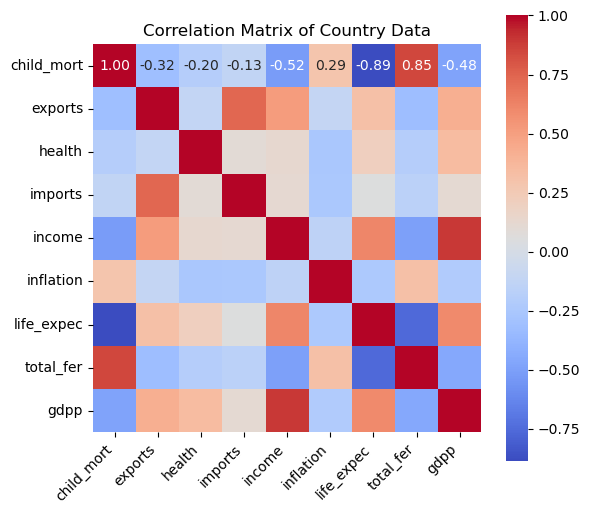

In [7]:
# Exclude non-numeric columns
numeric_df = df_country_data.select_dtypes(include=[np.number])

# Now, compute the correlation matrix for the numeric columns only
correlation_matrix = numeric_df.corr()

# Proceed with the heatmap visualization as before
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .82})
plt.title('Correlation Matrix of Country Data')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<u>We observe several variables with strong positive/negative correlations.</u>  
E.g.  
child_mort & life_expec = -0.89  
child_mort & total_fer = 0.85  
income & gdp = 0.90  

**This is a strong argument for using Principal Component Analysis for dimensionality reduction.** 

# 5. Principal Component Analysis (PCA) for dimensionality reduction

### 5.1 Running PCA and choosing the optimal amount of principal components

First we should standardise our data since PCA can be highly sensitive to scale.

In [8]:
# focusing on numeric columns only
numeric_columns = df_country_data.select_dtypes(include=[np.number]).columns

# standardising scalar
scaler = StandardScaler()

# standardize the numeric columns
df_country_data_std = df_country_data.copy()
df_country_data_std[numeric_columns] = scaler.fit_transform(df_country_data[numeric_columns])
display(df_country_data_std)


country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer      gdpp  
0     0.157336   -1.619092   1.902882 -0.679180  
1    -0.312347    0.647866  -0.859973 -0.485623  
2     0.789274    0.670423  -0.038404 -0.465376  
3     1.387054   -1.179234   2.128151 -0.516268  
4    -0.601749    0.704258  -0.541946 -0.041817  
..         ...         ...        ...       ...  
162  -0.489784   -0.852161   0.365754 -0.546913  
163   3.616865    0.546361  -0.316678  0.029323  
164   0.409732    0.286958  -0.661206 -0.637754  
165   1.500916   -0.344633   1.140944 -0.637754  
166   0.590015   -2.092785   1.624609 -0.629546  

[167 rows x 10 columns]

<u>Now, we apply PCA on our standardised data:</u>


In [9]:
pca = PCA()
pca.fit(df_country_data_std[numeric_columns])

# Calculate the cumulative sum of explained variances
explained_variances = np.cumsum(pca.explained_variance_ratio_)

<u>And let us visualise the explained variance by each number of Principal Components</u>

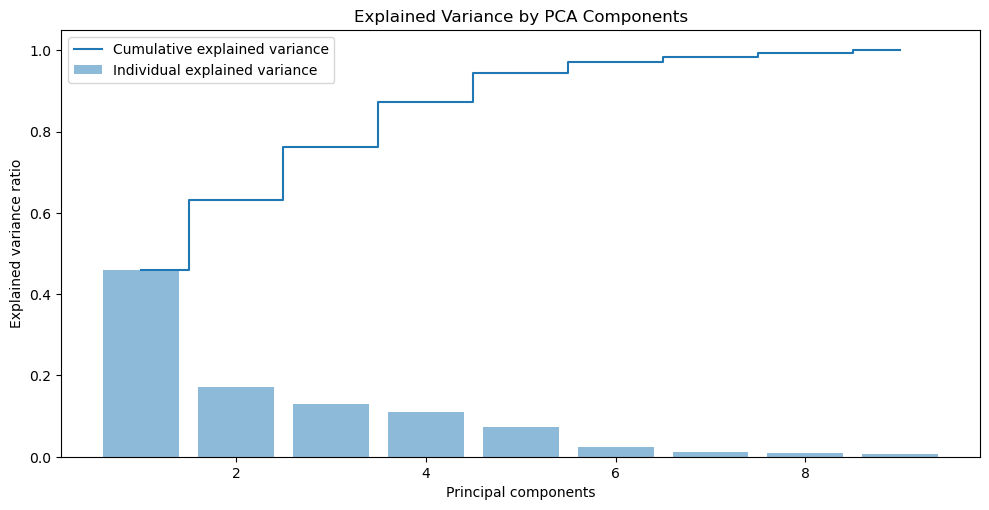

PC1: 0.46
PC2: 0.63
PC3: 0.76
PC4: 0.87
PC5: 0.95
PC6: 0.97
PC7: 0.98
PC8: 0.99
PC9: 1.00


In [10]:
# Visualize the explained variance by the number of components
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variances) + 1), explained_variances, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Explained Variance by PCA Components')
plt.show()

# Display the amount of variance explained by each component
for i, exp_var in enumerate(explained_variances):
    print(f"PC{i+1}: {exp_var:.2f}")


  
**As you can see, using only 4 principal components explains as much as 87% of the variance in the dataset, which is sufficient. Using 5+ PCs is unecessary and reduces the intepretability of our results.**

### 5.2 Interpreting the PCA results

As will be discussed below in more detail, we can broadly interpret our four principle components as follows:

* **PC1** encapsulates a broad **"Prosperity and Health"** factor.  
* **PC2** focuses on **"Trade Activity"** highlighting economies with significant foreign trade activity.  
* **PC3** represents **"Economic Stability"** with a focus on the implications of inflation and a lessened emphasis on health expenditure.  
* **PC4** brings out a **"Health-Wealth Paradox Factor"** factor, which highlights how wealth doees not always lead to good health outcomes.

In [11]:
# lets observe the weightings of each principal component to better understand each one
weightings = pca.components_

# Create a DataFrame to make it easier to visualize the loadings
weightings_df = pd.DataFrame(weightings, columns=numeric_columns, index=[f'PC{i+1}' for i in range(weightings.shape[0])])

# Display the loadings for the first four principal components
display(weightings_df.iloc[:4])


child_mort   exports    health   imports    income  inflation  \
PC1   -0.419519  0.283897  0.150838  0.161482  0.398441  -0.193173   
PC2    0.192884  0.613163 -0.243087  0.671821  0.022536  -0.008404   
PC3   -0.029544  0.144761 -0.596632 -0.299927  0.301548   0.642520   
PC4    0.370653  0.003091  0.461897 -0.071907  0.392159   0.150442   

     life_expec  total_fer      gdpp  
PC1    0.425839  -0.403729  0.392645  
PC2   -0.222707   0.155233 -0.046022  
PC3    0.113919   0.019549  0.122977  
PC4   -0.203797   0.378304  0.531995

**<u>Let us analyse our principal component weightings and intepretations in more detail:/u>**

**PC1: Prosperity and Health Factor**  

- Strong Negative: child_mort (-0.419), total_fer (-0.404) indicate that lower child mortality and fertility rates contribute significantly to PC1, suggesting it captures aspects of countries with better health outcomes.
- Strong Positive: income (0.398), gdpp (0.393), life_expec (0.426) show that higher income, GDP per capita, and life expectancy are closely associated with PC1, pointing towards economic prosperity and higher health standards.
- Moderate to Weak: exports (0.284), health (0.151), imports (0.161), and inflation (-0.193) have moderate influences, suggesting they play a role but are less definitive in characterising this component.

**PC2: Trade Activity Factor**

- Strong Positive: exports (0.613) and imports (0.672) show a strong association with PC2, indicating this component heavily represents countries' engagement in international trade.
- Moderate Negative: health (-0.243) implies that higher health spending is somewhat inversely related to this trade-focused component, perhaps indicating a trade-off between health expenditure and trade activity.
- Insignificant: income (0.023), inflation (-0.008), and gdpp (-0.046) have negligible weightings, suggesting they don't significantly contribute to the trade activity captured by PC2.

**PC3: Economic Stability Factor**

- Strong Positive: inflation (0.643) is highly significant, indicating PC3 captures aspects related to economic stability.
- Strong Negative: health (-0.597) suggests that countries with less focus on health expenditure are notable in this component, potentially pointing to an economic trade-off.
- Moderate Positive: income (0.302) also contributes, suggesting that higher income levels are part of the economic stability aspect captured by PC3.
- Insignificant: child_mort (-0.030), exports (0.145), and total_fer (0.020) have low weightings, indicating a minor role in defining this component.

**PC4: Health-Wealth Paradox Factor**

- Strong Positive: gdpp (0.532) and health (0.462) indicate that this component is significantly influenced by GDP per capita and health spending, pointing to countries that invest heavily in healthcare and are economically affluent.
- Moderate Positive: child_mort (0.371) and total_fer (0.378) show that higher values in this component may also be associated with higher fertility and child mortality rates, which is intriguing. This could suggest that despite economic wealth, some countries still face challenges in these areas.
- Moderate Negative: life_expec (-0.204) inversely relates to this component, which could indicate that in some wealthier countries, life expectancy might not be as high as expected, potentially due to lifestyle diseases or other factors.
- Insignificant: exports (0.003), imports (-0.072), and inflation (0.150) show negligible contributions to this component.

# 6. Employing k-means clustering to classify the broader dataset

### 6.1 Elbow Method to find the optimal number of clusters

In [12]:
# as discussed, we extract the first 4 principal components only
pca_components = pca.transform(df_country_data_std[numeric_columns])
df_pca = pd.DataFrame(pca_components[:, :4], columns=['PC1', 'PC2', 'PC3', 'PC4'])


**Mathematical intuition for the elbow method:** The elbow method method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters to look for an "elbow" point where the rate of decrease sharply changes. This represents a point at which increasing the number of clusters on leads to marginal improvements in the sum of squared errors. 

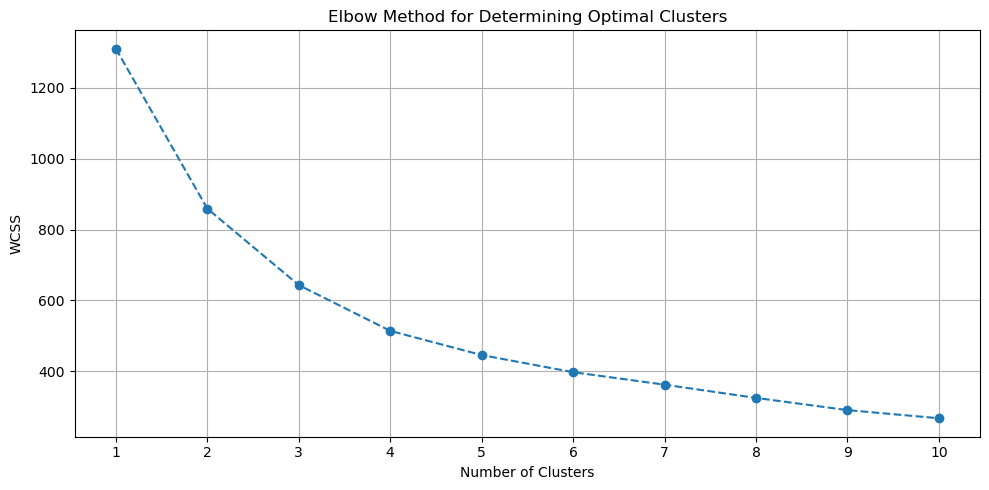

In [13]:
# plotting the chart

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.show()


**k=5 clusters seems to be a sensible elbow point where the rate of improvement flattens. As will be shown later, the clusters are easily interpretable. Off the record I experimented with larger amounts of k which did <u>not</u> lead to deeper insights.**

### 6.2 Performing k-means clustering

In [14]:
# k-means with k=5 clusters
k = 5

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Add the cluster labels to your PCA DataFrame
df_pca['Cluster'] = clusters


### 6.3 Visualising the clusters

One way to visualise our clusters is in two dimensions, with a different principal component on each axis. It is possible to make some observations this way but it is somewhat laboursome to do so. As such we will visualise the data in another way I think is clearer to do so.  

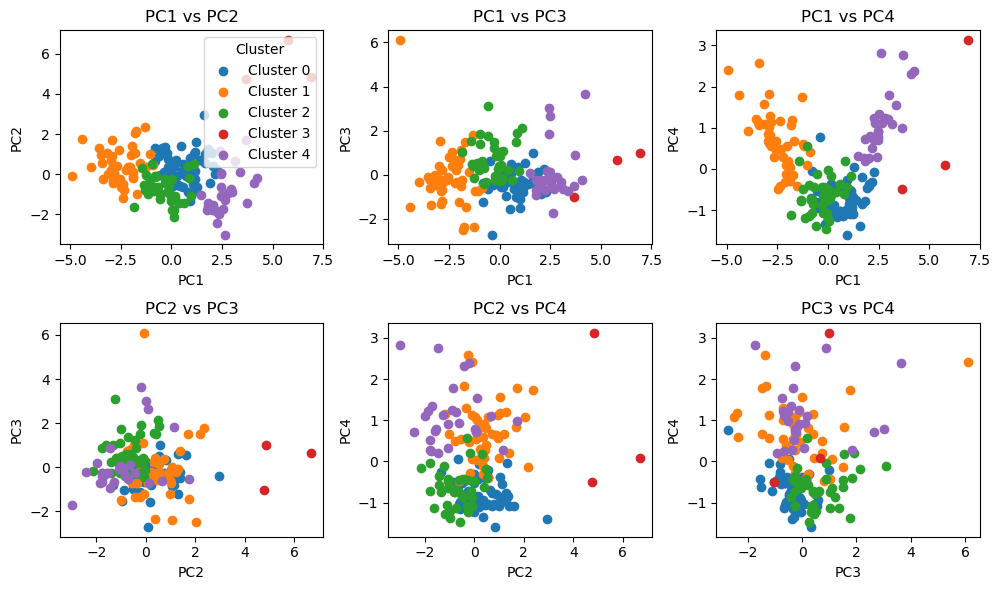

In [15]:
# visualising clusters in two dimensions

# Initialize matplotlib figure for subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Titles for each subplot
titles = [
    'PC1 vs PC2', 'PC1 vs PC3', 'PC1 vs PC4',
    'PC2 vs PC3', 'PC2 vs PC4', 'PC3 vs PC4'
]

# Pairs of PCs to plot against each other
pc_pairs = [
    ('PC1', 'PC2'), ('PC1', 'PC3'), ('PC1', 'PC4'),
    ('PC2', 'PC3'), ('PC2', 'PC4'), ('PC3', 'PC4')
]

for ax, (pc_x, pc_y), title in zip(axs.flat, pc_pairs, titles):
    for i in range(k):
        ax.scatter(df_pca.loc[df_pca['Cluster'] == i, pc_x], df_pca.loc[df_pca['Cluster'] == i, pc_y], label=f'Cluster {i}')
    ax.set_title(title)
    ax.set_xlabel(pc_x)
    ax.set_ylabel(pc_y)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display legend for the first subplot for clarity
axs[0, 0].legend(title='Cluster')

plt.show()



**<u>A better way to visualise the results in my opinion is by calculating the average values of each cluster along each principal component and plotting the results. This way we get a much clearer picture of the characteristics of each cluster.</u>**

We implement this in the below code.

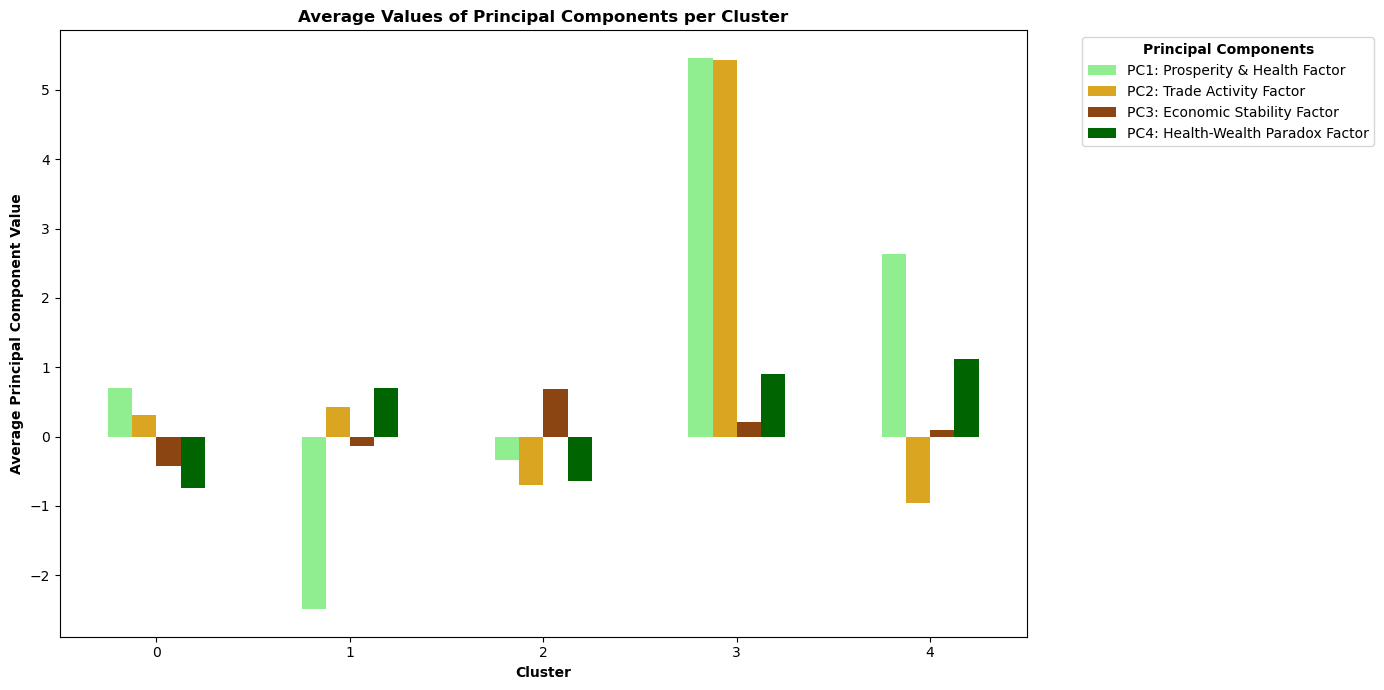

In [16]:
# calculate mean of principal components for each cluster
pc_cluster_means = df_pca.groupby('Cluster').mean()

colors = ['#90ee90', '#daa520', '#8b4513', '#006400']

# plotting the results
ax = pc_cluster_means[['PC1', 'PC2', 'PC3', 'PC4']].plot(kind='bar', figsize=(14, 7), color=colors)
plt.title('Average Values of Principal Components per Cluster', fontweight="bold")
plt.ylabel('Average Principal Component Value', fontweight="bold")
plt.xlabel('Cluster',fontweight="bold")
plt.xticks(rotation=0)  # Ensure cluster labels are horizontal for readability

# Define custom legend labels
legend_labels = [
    'PC1: Prosperity & Health Factor',
    'PC2: Trade Activity Factor',
    'PC3: Economic Stability Factor',
    'PC4: Health-Wealth Paradox Factor'
]

# Set custom legend
ax.legend(legend_labels, title='Principal Components', bbox_to_anchor=(1.05, 1), loc='upper left', 
          title_fontproperties={'weight': 'bold'})

plt.tight_layout()
plt.show()


**This graph is much better at displaying the clusters characteristics.**

**For example, <u>cluster 1</u> draws particular attention as being composed of countries with <u>significantly lower scoring in the Development & Health Factor.</u>**

In [17]:
# adding a column for "cluster" to original dataset
df_country_data['Cluster'] = clusters

In [18]:
# let's look at cluster 1
target_cluster = 1

# filter df to only include cluster 1
countries_in_cluster = df_country_data[df_country_data['Cluster'] == target_cluster]['country']
poorest_countries = df_country_data[df_country_data['Cluster'] == target_cluster]
poorest_countries = poorest_countries.drop(columns=['Cluster'])

# display cluster 1
display(f"Countries in Cluster {target_cluster}:")
for country in countries_in_cluster:
    display(country)

'Countries in Cluster 1:'

'Afghanistan'

'Angola'

'Benin'

'Botswana'

'Burkina Faso'

'Burundi'

'Cameroon'

'Central African Republic'

'Chad'

'Comoros'

'Congo, Dem. Rep.'

'Congo, Rep.'

"Cote d'Ivoire"

'Equatorial Guinea'

'Eritrea'

'Gambia'

'Ghana'

'Guinea'

'Guinea-Bissau'

'Haiti'

'Kenya'

'Kiribati'

'Lao'

'Lesotho'

'Liberia'

'Madagascar'

'Malawi'

'Mali'

'Mauritania'

'Mozambique'

'Namibia'

'Niger'

'Nigeria'

'Pakistan'

'Rwanda'

'Senegal'

'Sierra Leone'

'South Africa'

'Sudan'

'Tanzania'

'Timor-Leste'

'Togo'

'Uganda'

'Yemen'

'Zambia'

**We have a cluster of our top candidates for aid. But we also have a problem, there are 45! "poorer" countries in this cluster. We need to narrow down more...**

# 7. Focusing on poorer countries

Now that we have identified a pool of poorest countries. The issue of identifying those most in need becomes more sensitive. As a data scientist, I need to be appreciative of the fact that numbers do not tell the full story. 

The approach I take next is to characterise the countries across two domains:  
(i) Economic Status  
(ii) Health Crisis Status  

***Note: some steps are skipped/not showed below for sake of simplicity. E.g. when running clustering I do not showcase elbow method for deducing optimal number of clusters to use.***

### 7.1 Clustering: preparing the data

First we will focus on just economic variables and identify countries most in need of financial support. As such we drop variables not relating to economic indicators.

In [20]:
economic_data = poorest_countries.reset_index().drop(['exports', 'imports', 'child_mort', 'life_expec', 'total_fer', 'index'], axis=1)
health_data = poorest_countries.reset_index().drop(['exports', 'imports', 'income', 'inflation', 'gdpp', "health", 'index'], axis=1)


We standardise the data for both economic/health:

In [21]:
# focusing on numeric columns only
numeric_columns_eco = economic_data.select_dtypes(include=[np.number]).columns
numeric_columns_health = health_data.select_dtypes(include=[np.number]).columns

# standardising scalar
scaler = StandardScaler()

# standardize the data
economic_data_std = economic_data.copy()
economic_data_std[numeric_columns_eco] = scaler.fit_transform(economic_data[numeric_columns_eco])

health_data_std = health_data.copy()
health_data_std[numeric_columns_health] = scaler.fit_transform(health_data[numeric_columns_health])


Keep only numeric columns to prepare for clustering process.

In [22]:
economic_data_std_numeric = economic_data_std.drop(['country'], axis=1)
health_data_std_numeric = health_data_std.drop(['country'], axis=1)

### 7.2 Clustering: which countries face the greatest economic hardships?

Perform k-means clustering with k = 6 on economic variables for poorest countries & plotting the results:

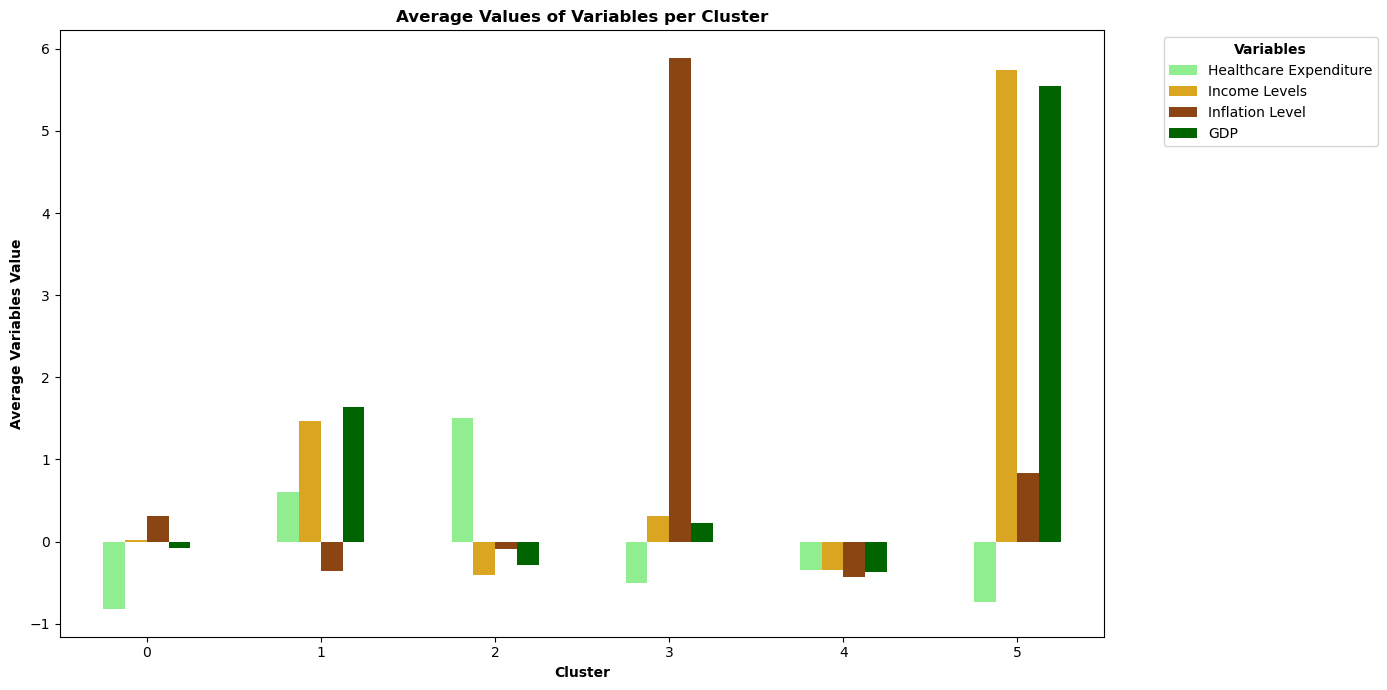

In [23]:
# clustering with k=6 clusters
k = 6

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(economic_data_std_numeric)

# Add the cluster labels to economic_data_std_numeric & economic_data_std & poorest_countries dfs
economic_data_std_numeric['Economic Cluster'] = clusters
economic_data_std['Economic Cluster'] = clusters
poorest_countries['Economic Cluster'] = clusters

# average value of each cluster along each pc
pc_cluster_means = economic_data_std_numeric.groupby('Economic Cluster').mean()

colors = ['#90ee90', '#daa520', '#8b4513', '#006400'] 

ax = pc_cluster_means[['health', 'income', 'inflation', 'gdpp']].plot(kind='bar', figsize=(14, 7), color=colors)
plt.title('Average Values of Variables per Cluster', fontweight="bold")
plt.ylabel('Average Variables Value', fontweight="bold")
plt.xlabel('Cluster',fontweight="bold")
plt.xticks(rotation=0)  # Ensure cluster labels are horizontal for readability

# define custom legend labels
legend_labels = [
    'Healthcare Expenditure',
    'Income Levels',
    'Inflation Level',
    'GDP'
]

#  custom legend
ax.legend(legend_labels, title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left', 
          title_fontproperties={'weight': 'bold'})

plt.tight_layout()
plt.show()


Observations: 

- Clusters 1 & 5 draw attention as relatively richer nations with higher GDPs and income levels. While certainly facing their own set of issues, they are in a much better financial position to support their populations.
- Cluster 3 is solely Nigeria characterised by its very high inflation level.
- Clusters 2 & 4 contain our poorest countries. The distinction between the clusters being levels of healthcare expenditure. The reasons for the difference is unclear and to be expored in the next section.
- Cluster 0 is poor countries with the lowest healthcare expenditure.

### 7.3 Clustering: which countries face the greatest public health crises?

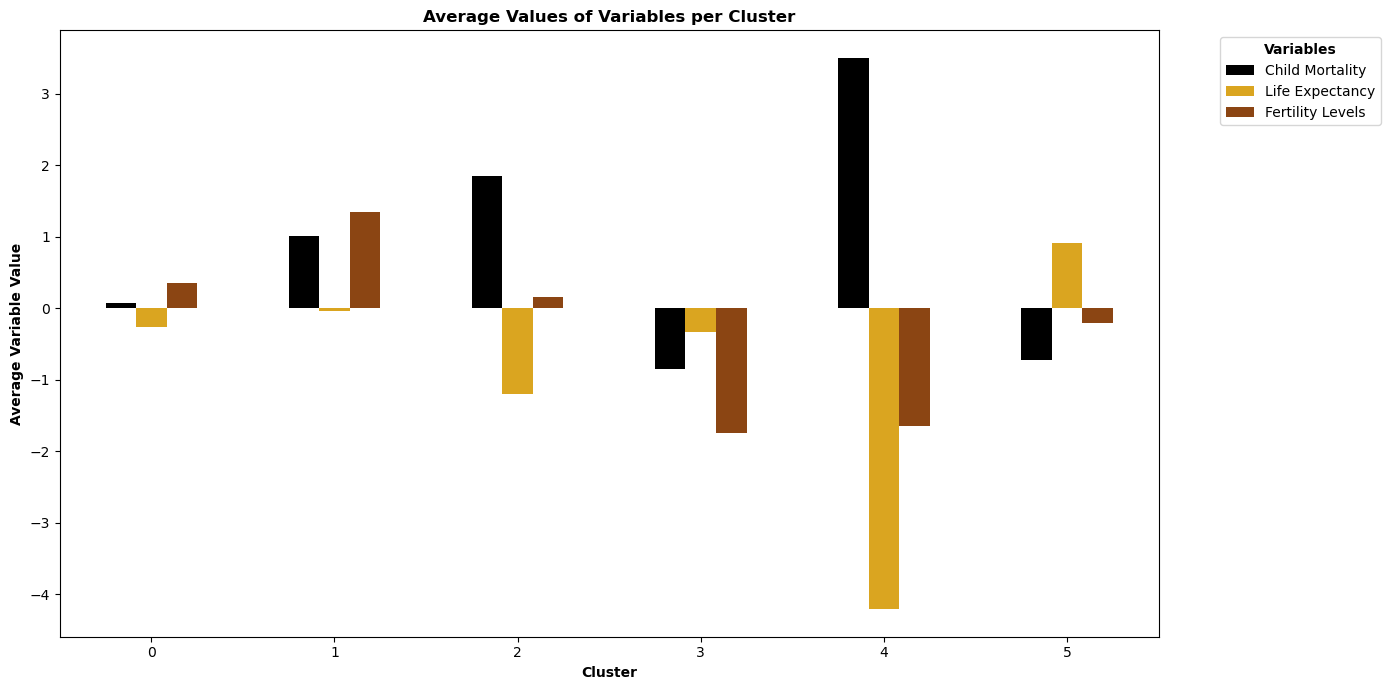

In [24]:
# clustering with k=6 clusters
k = 6

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(health_data_std_numeric)

# Add the cluster labels to health_data_std_numeric & health_data_std & poorest_countries dfs
health_data_std_numeric['Health Cluster'] = clusters
health_data_std['Health Cluster'] = clusters
poorest_countries['Health Cluster'] = clusters


# average value of each cluster along each pc
pc_cluster_means = health_data_std_numeric.groupby('Health Cluster').mean()

colors = ['black', '#daa520', '#8b4513', '#006400'] 

ax = pc_cluster_means[['child_mort', 'life_expec', 'total_fer']].plot(kind='bar', figsize=(14, 7), color=colors)
plt.title('Average Values of Variables per Cluster', fontweight="bold")
plt.ylabel('Average Variable Value', fontweight="bold")
plt.xlabel('Cluster',fontweight="bold")
plt.xticks(rotation=0)  # Ensure cluster labels are horizontal for readability

# define custom legend labels
legend_labels = [
    'Child Mortality',
    'Life Expectancy',
    'Fertility Levels'
]

#  custom legend
ax.legend(legend_labels, title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left', 
          title_fontproperties={'weight': 'bold'})

plt.tight_layout()
plt.show()


Observations:
- Clusters 2 & 4 catch the eye as those with the greatest child mortality rates and lowest life expectancies. These are the group of countries facing the greatest public health challanges.
- Cluster 1 exhibits high levels of child mortality related to seemingly very high fertility rates.
- Clusters 0 and 3 have moderate to low levels of child mortality, life expectancy & fertility rates. Countries clearly face challenges but likely not to the same extent as clusters 3,4 & 5.
- Cluster 5 seems to be a group of countries with relatively lower child mortality, highest life expectancy and lower fertility levels.

### 7.4 Final Results: to be used in context and in collaboration with domain expertise

**poorest_countries** df containing the poorest countries characterised by "Health" & "Economic" clusters as described in previous section.  

In [25]:
poorest_countries

country  child_mort  exports  health  imports  income  \
0                 Afghanistan        90.2    10.00    7.58     44.9    1610   
3                      Angola       119.0    62.30    2.85     42.9    5900   
17                      Benin       111.0    23.80    4.10     37.2    1820   
21                   Botswana        52.5    43.60    8.30     51.3   13300   
25               Burkina Faso       116.0    19.20    6.74     29.6    1430   
26                    Burundi        93.6     8.92   11.60     39.2     764   
28                   Cameroon       108.0    22.20    5.13     27.0    2660   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
32                       Chad       150.0    36.80    4.53     43.5    1930   
36                    Comoros        88.2    16.50    4.51     51.7    1410   
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
38                Congo, Rep.        63.9    85.10    2.46     54.7    5190   
40              Cote d'Ivoire       111.0    50.60    5.30     43.3    2690   
49          Equatorial Guinea       111.0    85.80    4.48     58.9   33700   
50                    Eritrea        55.2     4.79    2.66     23.3    1420   
56                     Gambia        80.3    23.80    5.69     42.7    1660   
59                      Ghana        74.7    29.50    5.22     45.9    3060   
63                     Guinea       109.0    30.30    4.93     43.2    1190   
64              Guinea-Bissau       114.0    14.90    8.50     35.2    1390   
66                      Haiti       208.0    15.30    6.91     64.7    1500   
80                      Kenya        62.2    20.70    4.75     33.6    2480   
81                   Kiribati        62.7    13.30   11.30     79.9    1730   
84                        Lao        78.9    35.40    4.47     49.3    3980   
87                    Lesotho        99.7    39.40   11.10    101.0    2380   
88                    Liberia        89.3    19.10   11.80     92.6     700   
93                 Madagascar        62.2    25.00    3.77     43.0    1390   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
97                       Mali       137.0    22.80    4.98     35.1    1870   
99                 Mauritania        97.4    50.70    4.41     61.2    3320   
106                Mozambique       101.0    31.50    5.21     46.2     918   
108                   Namibia        56.0    47.80    6.78     60.7    8460   
112                     Niger       123.0    22.20    5.16     49.1     814   
113                   Nigeria       130.0    25.30    5.07     17.4    5150   
116                  Pakistan        92.1    13.50    2.20     19.4    4280   
126                    Rwanda        63.6    12.00   10.50     30.0    1350   
129                   Senegal        66.8    24.90    5.66     40.3    2180   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   
137              South Africa        53.7    28.60    8.94     27.4   12000   
142                     Sudan        76.7    19.70    6.32     17.2    3370   
147                  Tanzania        71.9    18.70    6.01     29.1    2090   
149               Timor-Leste        62.6     2.20    9.12     27.8    1850   
150                      Togo        90.3    40.20    7.65     57.3    1210   
155                    Uganda        81.0    17.10    9.01     28.6    1540   
165                     Yemen        56.3    30.00    5.18     34.4    4480   
166                    Zambia        83.1    37.00    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  Economic Cluster  Health Cluster  
0        9.440        56.2       5.82    553                 4               0  
3       22.400        60.1       6.16   3530                 0               1  
17       0.885        61.8       5.36    758                 4               0  
21       8.920        57.1       2.88   6350                 1 

Of particular note are **(1) countries facing the greatest economic hardships (Economic Clusters 2 & 4)**...

In [26]:
# I define a simple function that let's me filter the above dataframe by Health / Economic cluster.

def filter_by_clusters(df, health_clusters=None, economic_clusters=None):
    mask = pd.Series(True, index=df.index)
    # health cluster filter
    if health_clusters is not None:
        mask &= df['Health Cluster'].isin(health_clusters)
    # economic cluster filter
    if economic_clusters is not None:
        mask &= df['Economic Cluster'].isin(economic_clusters)
    # filter the df
    filtered_df = df.loc[mask]
    
    return filtered_df

# Filtering economic clusters 2 & 4:
filtered_df = filter_by_clusters(poorest_countries, economic_clusters=[2,4])
display(filtered_df)


country  child_mort  exports  health  imports  income  \
0                 Afghanistan        90.2    10.00    7.58     44.9    1610   
17                      Benin       111.0    23.80    4.10     37.2    1820   
25               Burkina Faso       116.0    19.20    6.74     29.6    1430   
26                    Burundi        93.6     8.92   11.60     39.2     764   
28                   Cameroon       108.0    22.20    5.13     27.0    2660   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
32                       Chad       150.0    36.80    4.53     43.5    1930   
36                    Comoros        88.2    16.50    4.51     51.7    1410   
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
40              Cote d'Ivoire       111.0    50.60    5.30     43.3    2690   
56                     Gambia        80.3    23.80    5.69     42.7    1660   
64              Guinea-Bissau       114.0    14.90    8.50     35.2    1390   
66                      Haiti       208.0    15.30    6.91     64.7    1500   
80                      Kenya        62.2    20.70    4.75     33.6    2480   
81                   Kiribati        62.7    13.30   11.30     79.9    1730   
87                    Lesotho        99.7    39.40   11.10    101.0    2380   
88                    Liberia        89.3    19.10   11.80     92.6     700   
93                 Madagascar        62.2    25.00    3.77     43.0    1390   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
97                       Mali       137.0    22.80    4.98     35.1    1870   
106                Mozambique       101.0    31.50    5.21     46.2     918   
112                     Niger       123.0    22.20    5.16     49.1     814   
126                    Rwanda        63.6    12.00   10.50     30.0    1350   
129                   Senegal        66.8    24.90    5.66     40.3    2180   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   
147                  Tanzania        71.9    18.70    6.01     29.1    2090   
149               Timor-Leste        62.6     2.20    9.12     27.8    1850   
150                      Togo        90.3    40.20    7.65     57.3    1210   
155                    Uganda        81.0    17.10    9.01     28.6    1540   

     inflation  life_expec  total_fer  gdpp  Economic Cluster  Health Cluster  
0        9.440        56.2       5.82   553                 4               0  
17       0.885        61.8       5.36   758                 4               0  
25       6.810        57.9       5.87   575                 4               1  
26      12.300        57.7       6.26   231                 2               0  
28       1.910        57.3       5.11  1310                 4               0  
31       2.010        47.5       5.21   446                 4               2  
32       6.390        56.5       6.59   897                 4               1  
36       3.870        65.9       4.75   769                 4               5  
37      20.800        57.5       6.54   334                 2               1  
40       5.390        56.3       5.27  1220                 4               0  
56       4.300        65.5       5.71   562                 4               5  
64       2.970        55.6       5.05   547                 2               0  
66       5.450        32.1       3.33   662                 4               4  
80       2.090        62.8       4.37   967                 4               5  
81       1.520        60.7       3.84  1490                 2               3  
87       4.150        46.5       3.30  1170                 2               3  
88       5.470        60.8       5.02   327                 2               0  
93       8.790        60.8       4.60   413                 4               5  
94      12.100        53.1       5.31   459                 4               0  
97       4.370        59.5       6.55   708        

... & **(2) the countries facing the greatest public health challenges (Health Clusters 1, 2, 4)**...

In [27]:
# filtering health clusters 1,2 & 4:
filtered_df = filter_by_clusters(poorest_countries, health_clusters=[1,2,4])
display(filtered_df)


country  child_mort  exports  health  imports  income  \
3                      Angola       119.0     62.3    2.85     42.9    5900   
25               Burkina Faso       116.0     19.2    6.74     29.6    1430   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
32                       Chad       150.0     36.8    4.53     43.5    1930   
37           Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609   
66                      Haiti       208.0     15.3    6.91     64.7    1500   
97                       Mali       137.0     22.8    4.98     35.1    1870   
112                     Niger       123.0     22.2    5.16     49.1     814   
113                   Nigeria       130.0     25.3    5.07     17.4    5150   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   

     inflation  life_expec  total_fer  gdpp  Economic Cluster  Health Cluster  
3        22.40        60.1       6.16  3530                 0               1  
25        6.81        57.9       5.87   575                 4               1  
31        2.01        47.5       5.21   446                 4               2  
32        6.39        56.5       6.59   897                 4               1  
37       20.80        57.5       6.54   334                 2               1  
66        5.45        32.1       3.33   662                 4               4  
97        4.37        59.5       6.55   708                 4               1  
112       2.55        58.8       7.49   348                 4               1  
113     104.00        60.5       5.84  2330                 3               1  
132      17.20        55.0       5.20   399                 2               2

**Below we highlight countries with both the greatest economic <u>AND</u> public health hardships:**

In [28]:
# filtering health clusters and economic clusters:
filtered_df = filter_by_clusters(poorest_countries, economic_clusters=[2,4],health_clusters=[1,2,4])
display(filtered_df)


country  child_mort  exports  health  imports  income  \
25               Burkina Faso       116.0     19.2    6.74     29.6    1430   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
32                       Chad       150.0     36.8    4.53     43.5    1930   
37           Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609   
66                      Haiti       208.0     15.3    6.91     64.7    1500   
97                       Mali       137.0     22.8    4.98     35.1    1870   
112                     Niger       123.0     22.2    5.16     49.1     814   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   

     inflation  life_expec  total_fer  gdpp  Economic Cluster  Health Cluster  
25        6.81        57.9       5.87   575                 4               1  
31        2.01        47.5       5.21   446                 4               2  
32        6.39        56.5       6.59   897                 4               1  
37       20.80        57.5       6.54   334                 2               1  
66        5.45        32.1       3.33   662                 4               4  
97        4.37        59.5       6.55   708                 4               1  
112       2.55        58.8       7.49   348                 4               1  
132      17.20        55.0       5.20   399                 2               2

### 7.5 The only specific recommendation I will make...

**<u>Haiti</u> is the country that requires the most immediate aid.**

It has the lowest life expectancy...

In [29]:
poorest_countries.sort_values(by='life_expec', ascending=True).head(5)

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
87                    Lesotho        99.7     39.4   11.10    101.0    2380   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
166                    Zambia        83.1     37.0    5.89     30.9    3280   
94                     Malawi        90.5     22.8    6.59     34.9    1030   

     inflation  life_expec  total_fer  gdpp  Economic Cluster  Health Cluster  
66        5.45        32.1       3.33   662                 4               4  
87        4.15        46.5       3.30  1170                 2               3  
31        2.01        47.5       5.21   446                 4               2  
166      14.00        52.0       5.40  1460                 0               0  
94       12.10        53.1       5.31   459                 4               0

The highest child mortality...

In [30]:
poorest_countries.sort_values(by='child_mort', ascending=False).head(5)

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   

     inflation  life_expec  total_fer  gdpp  Economic Cluster  Health Cluster  
66        5.45        32.1       3.33   662                 4               4  
132      17.20        55.0       5.20   399                 2               2  
32        6.39        56.5       6.59   897                 4               1  
31        2.01        47.5       5.21   446                 4               2  
97        4.37        59.5       6.55   708                 4               1

And belongs to Economic Cluster 4, which we identified to be the group of countries with the lowest levels of financial health. 

In [31]:
poorest_countries[poorest_countries["country"]=="Haiti"]

country  child_mort  exports  health  imports  income  inflation  \
66   Haiti       208.0     15.3    6.91     64.7    1500       5.45   

    life_expec  total_fer  gdpp  Economic Cluster  Health Cluster  
66        32.1       3.33   662                 4               4

# 8. Acknowledgements

Data downloaded from Kaggle website: https://www.kaggle.com/datasets/gauravduttakiit/help-international/data